In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from userfunctions import *

In [5]:
sns.set()

In [2]:
#загрузили исходные данные
df_raw = pd.read_excel(r'Prioksk_Air_in.xlsx')
#очистили их от того, что не потребуется и что может привести к ошибкам
df = PrepareDataFrame(df_raw.copy())
#создадим копию для удобства
data_total = df.copy()
winter_data, spring_data, summer_data, autumn_data = PrepareSeasonalDataFrame(df.copy())

Некорректные строки удалены:

        YY  MM  DD  TSP  SO2  SO4   HG   PB   CD  NO2
5187  1998   9  31  NaN  0.0  NaN  NaN  NaN  NaN  NaN


# CD

In [3]:
ELEM_NAME = 'CD'
ELEM = CreateDataBySeasons(ELEM_NAME
                           , data_total, winter_data, spring_data, summer_data, autumn_data
                           , with_zero=True)
VALUES = ExtractValues(ELEM)

if CountZerosInData(VALUES['all'], ELEM_NAME) > 0:
    #НЕ словарь, просто массив по полной выборке соответ-го элемента
    ELEM_NOT_NULL = CreateDataBySeasons(ELEM_NAME
                                        , data_total, winter_data, spring_data, summer_data, autumn_data
                                        , with_zero=False)
    VALUES_NOT_NULL = ExtractValues(ELEM_NOT_NULL)
else:
    VALUES_NOT_NULL = VALUES

Число нулевых элементов в полной выборке CD: 0



Гистограмма для полной выборки CD


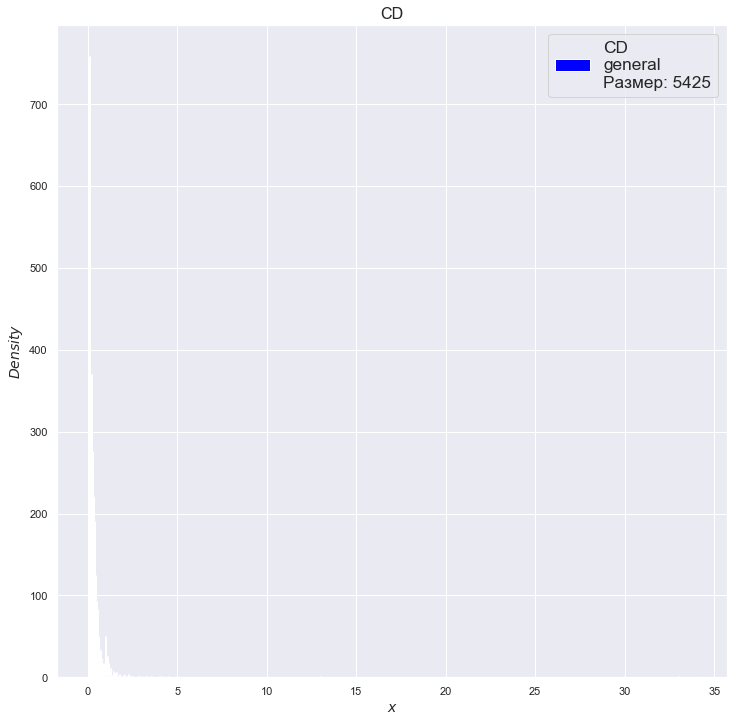

In [6]:
HistOnSample(VALUES['all'],ELEM_NAME)

In [7]:
start = datetime.datetime.now()
distr_ks, params_ks, p_v_ks, distr_chi2, params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL['all'])
print ('\nTook time: {0}'.format(datetime.datetime.now()-start))
#Chi2
#Best fitting distribution: alpha
#Best p value: 0.12520026293998215
#Parameters for the best fit: (2.5892735432894654, -0.20774797010663154, 1.0708160308882329)


Chi2
Best fitting distribution: lognorm
Best p value: 0.0005922204594667224
!!!Optimal Distribution on Chi Square was not found!!!

K-S
Best fitting distribution: mielke
Best p value: 0.0031948015340108058
!!!Optimal Distribution on K-S was not found!!!

Took time: 0:03:09.948898


In [8]:
distr_params_all = defaultdict(dict)
if p_v_ks >= 0.05:
    distr_params_all['general'][distr_ks] = params_ks
if p_v_chi2 >= 0.05:
    distr_params_all['general'][distr_chi2] = params_chi2

Text(0.5, 1.0, 'CD')

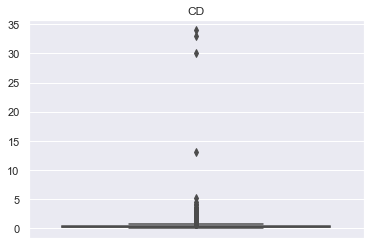

In [9]:
#sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(VALUES['all'],orient='v').set_title(ELEM_NAME)

In [10]:
SizeSample(VALUES['all'], ELEM_NAME)
k = CountZerosInData(VALUES['all'], ELEM_NAME)
CountByTreshold(VALUES['all'], ELEM_NAME, 0.1 , 0.01)

Размер полной выборки для CD равен 5425
Число нулевых элементов в полной выборке CD: 0

Посмотрим на число элементов выше и ниже некоторых порогов для выборки CD

Порог: 0.0, значений выше: 5425, ниже: 0
Порог: 0.01, значений выше: 5395, ниже: 30
Порог: 0.02, значений выше: 5359, ниже: 66
Порог: 0.03, значений выше: 5281, ниже: 144
Порог: 0.04, значений выше: 5199, ниже: 226
Порог: 0.05, значений выше: 5102, ниже: 323
Порог: 0.06, значений выше: 4985, ниже: 440
Порог: 0.07, значений выше: 4775, ниже: 650
Порог: 0.08, значений выше: 4662, ниже: 763
Порог: 0.09, значений выше: 4544, ниже: 881
Порог: 0.1, значений выше: 3926, ниже: 1499


Построение графика всей выборки для CD


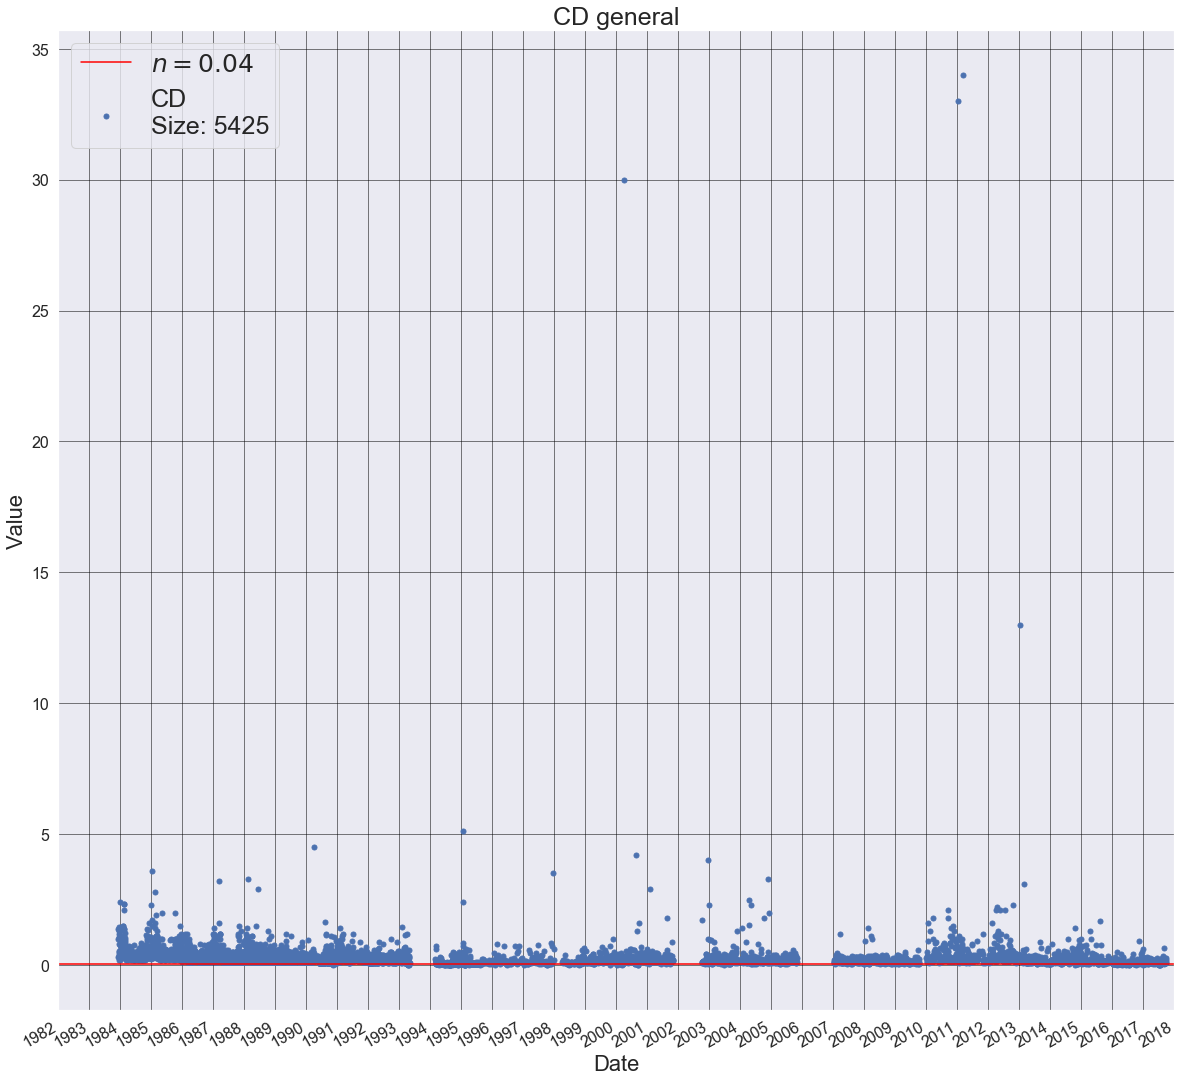

In [11]:
PlotElement(ELEM['all'],ELEM_NAME,'general',20,20,0.04)

Гистограмма 0-1 теста Колмогорова-Смирнова для выборки CD


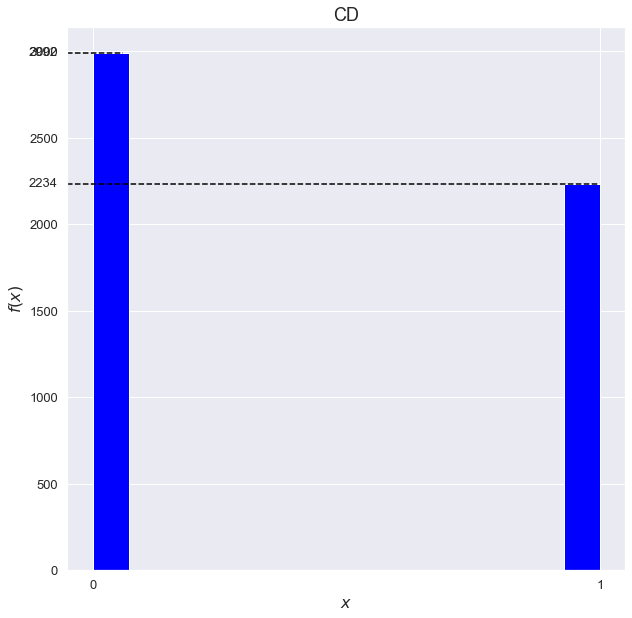

In [12]:
HistOnKSTest2Sample(KSTest2Sample(VALUES['all']), ELEM_NAME)

Принимаем гипотезу однородности К-С, если p-value > 0.05, сопоставляем ей 1, иначе 0
Число подряд идущих 1 - синим цветом, 0 - серым 


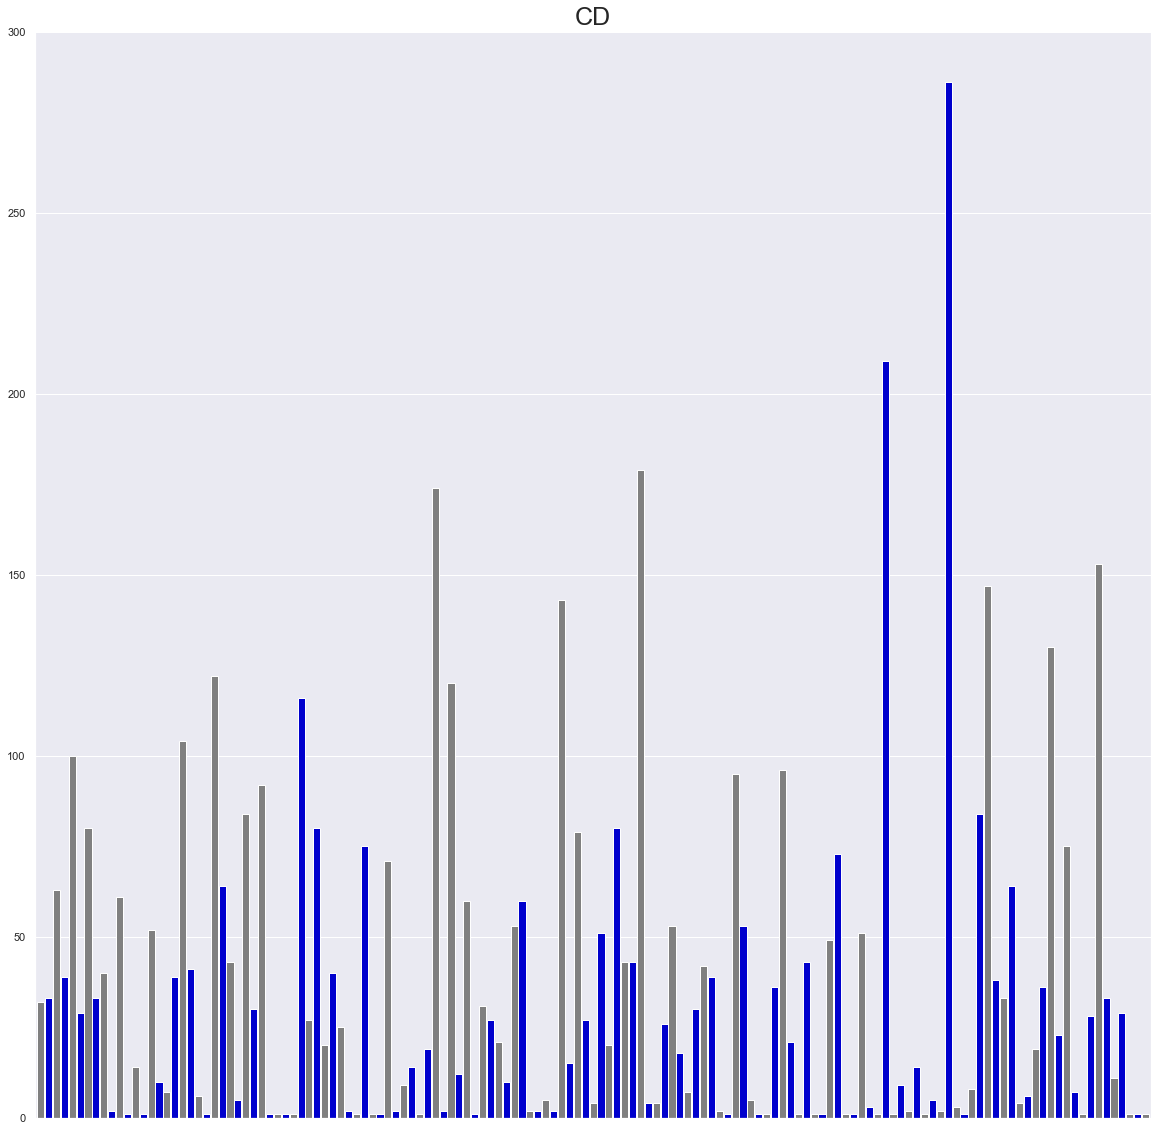

In [13]:
HistOnRepValues(RepeatedValuesCount(KSTest2Sample(VALUES['all'])),ELEM_NAME)

Поделим выборку на train и test (90 к 10), по 1-й оценим параметры, по 2-й проверим гипотезу о согласии К-С и Хи-квадрат для Гамма распределения

In [14]:
#GAMMA

#проверим на гамма распределение более "внимательно"

test_size = 0.1

while True: 
    train, test = train_test_split(VALUES_NOT_NULL['all'], test_size=test_size)
    params = FitParams(train,'gamma', floc=0)
    s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params)
    s_ks, p_ks = KSOnTest(test, 'gamma', params)
    if p_chi2 >= 0.05 or p_ks >= 0.05:
        break
        
print('shape,loc,scale = {0}, p_v on Chi2 = {1}, p_v on KS = {2}'.format(params, p_chi2, p_ks))
#based on chi2 and ks
#SO4
#shape,loc,scale = (1.1812266020050666, 0, 2.583799773183274), 
#p_v on Chi2 = 0.07386822862069643, p_v on KS = 0.06341678885027001

shape,loc,scale = (1.2939508685561625, 0, 0.2374601553216914), p_v on Chi2 = nan, p_v on KS = 0.07492198104249778


In [15]:
distr_params_all['general']['gamma'] = params

Гистограмма для выборки CD, сезон - general
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


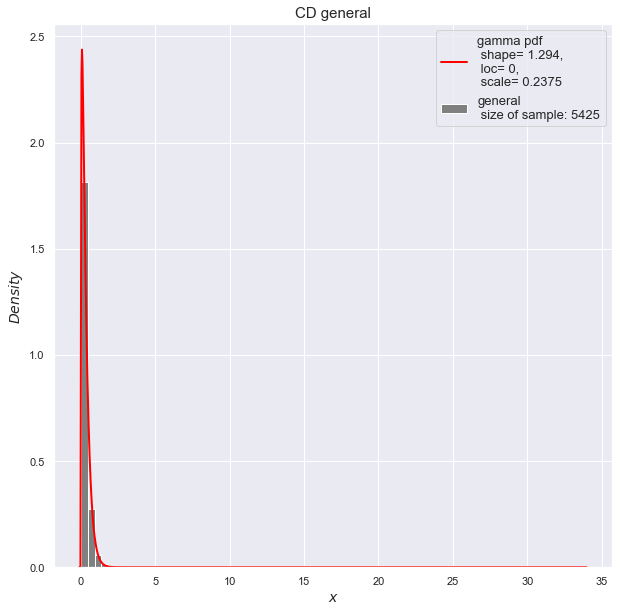

In [16]:
DistributionBySeason(VALUES['all'], ELEM_NAME, 'general', distr_params_all['general'])

In [17]:
distr_params_all

defaultdict(dict,
            {'general': {'gamma': (1.2939508685561625,
               0,
               0.2374601553216914)}})

In [18]:
#GAMMA
print('GAMMA\n')

stat, p_v = KSOnTest(test, 'gamma', params)
print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
stat, p_v = ChiSquareOnTest(test, 'gamma', params)
print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))

GAMMA

KS TEST:
Power_divergenceResult(statistic=0.05468093288795087, pvalue=0.07492198104249778)
CHISQARE TEST:
Power_divergenceResult(statistic=nan, pvalue=nan)


## Рассмотрим сезонные выборки

In [19]:
params_seasons = {}

In [20]:
#GAMMA

seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons = {}
train_test_seasons = {}
for s in seasons:
    while True: 
        train, test = train_test_split(VALUES_NOT_NULL[s], test_size=0.1)
        params_seasons[s] = FitParams(train, 'gamma',floc=0)
        s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params_seasons[s])
        s_ks, p_ks = KSOnTest(test, 'gamma', params_seasons[s])
        if p_chi2 >= 0.05 and p_ks >= 0.05:
            train_test_seasons[s] = [train, test]
            break
for s in seasons:
    print(s, ': ', params_seasons[s])
print('p_v on Chi2 = {0}, p_v on KS = {1}'.format(p_chi2, p_ks))

winter :  (1.126732581803696, 0, 0.3590312961987038)
spring :  (1.1274010235698786, 0, 0.3002455727424981)
summer :  (1.504221536856045, 0, 0.15669285327379334)
autumn :  (1.4674740764427492, 0, 0.18957255416230287)
p_v on Chi2 = 0.1306063377579685, p_v on KS = 0.09959294921425378


In [21]:
start = datetime.datetime.now()
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons_ks,params_seasons_chi2 = defaultdict(dict), defaultdict(dict)
train_test_seasons1 = {}
for s in seasons:
    print()
    print(s.upper())
    print()
    distr_ks,params_ks,p_v_ks, distr_chi2,params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL[s])
    if p_v_ks >= 0.05:
        params_seasons_ks[s][distr_ks] = params_ks
    if p_v_chi2 >= 0.05:
        params_seasons_chi2[s][distr_chi2] = params_chi2
print('\nTook time: {0}'.format(datetime.datetime.now()-start))



WINTER


Chi2
Best fitting distribution: lognorm
Best p value: 0.0829187031088943
Parameters for the best fit: (0.9347114231136747, 0.0, 0.2503847179891398)

K-S
Best fitting distribution: genexpon
Best p value: 0.4018594053682236
Parameters for the best fit: (7.633771721422229e-08, 0.3309270547520694, 2.8129231375557477, 0, 0.1154841162522488)

SPRING


Chi2
Best fitting distribution: lognorm
Best p value: 0.1754536078974217
Parameters for the best fit: (0.8513932425714217, -0.007575058989513965, 0.2170339021404485)

K-S
Best fitting distribution: powerlognorm
Best p value: 0.3396220353998692
Parameters for the best fit: (0.06628873989986415, 0.2543860283724836, -0.0453900128461492, 0.0906612154965768)

SUMMER


Chi2
Best fitting distribution: alpha
Best p value: 0.00010532141714978507
!!!Optimal Distribution on Chi Square was not found!!!

K-S
Best fitting distribution: lognorm
Best p value: 0.2111591973298869
Parameters for the best fit: (0.9125979988000439, 0.0, 0.1637483267106838

In [22]:
distr_params_seasons = defaultdict(dict)
for s in seasons:
    try:
        distr_ks, params_ks = list(params_seasons_ks[s].keys())[0], list(params_seasons_ks[s].values())[0] 
        distr_params_seasons[s][distr_ks] = params_ks
    except IndexError:
        continue
for s in seasons:
    try:
        distr_chi2, params_chi2 = list(params_seasons_chi2[s].keys())[0], list(params_seasons_chi2[s].values())[0] 
        distr_params_seasons[s][distr_chi2] = params_chi2
    except IndexError:
        continue
for s in seasons:
    params_gamma = params_seasons[s]
    distr_params_seasons[s]['gamma'] = params_gamma
    

Гистограмма для выборки CD, сезон - winter
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


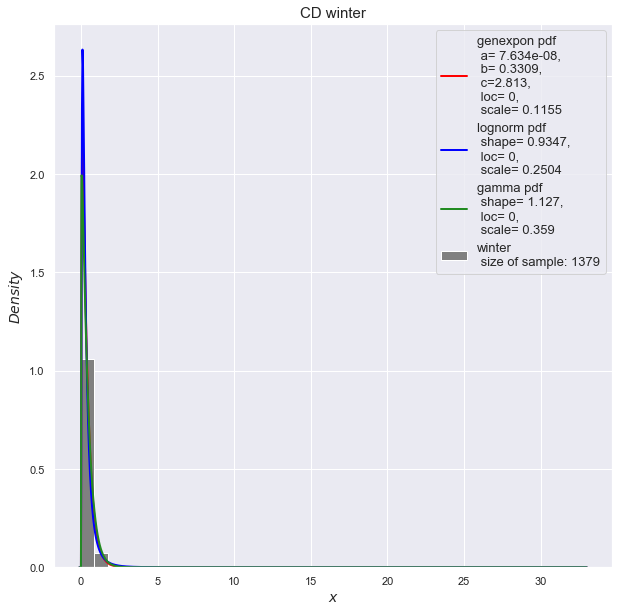

Гистограмма для выборки CD, сезон - spring
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


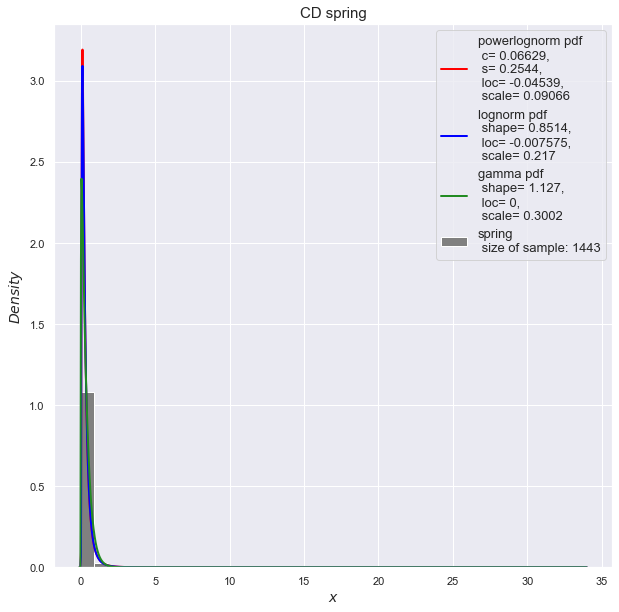

Гистограмма для выборки CD, сезон - summer
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


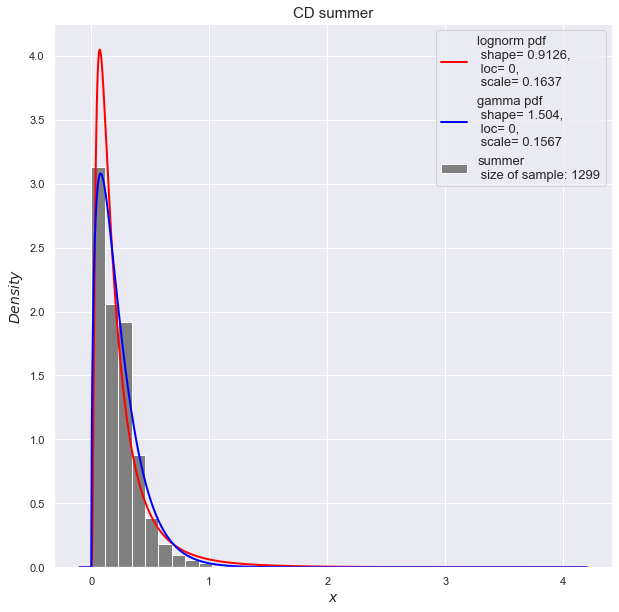

Гистограмма для выборки CD, сезон - autumn
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


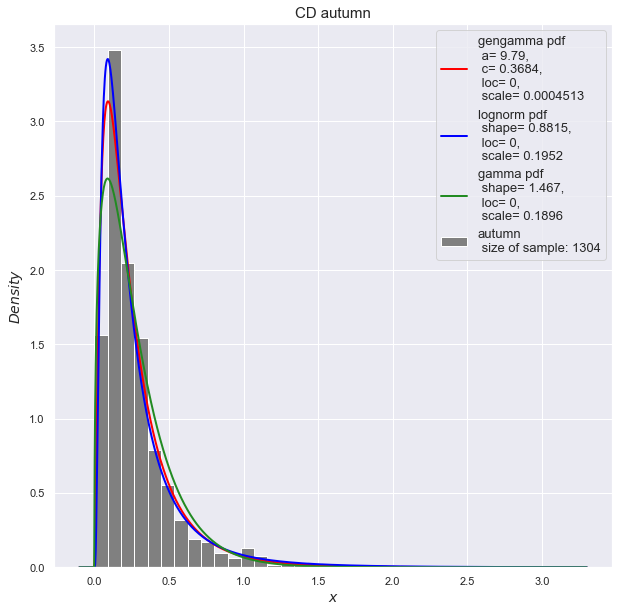

In [23]:
for s in seasons:
    DistributionBySeason(VALUES_NOT_NULL[s], ELEM_NAME, season=s,params_dict=distr_params_seasons[s])

### Проверка гипотезы о согласии Хи-квадрат и К-С для сезонных выборок для Гамма распределения
#### Для других подобранных распределений результаты выше

In [24]:
#GAMMA
for s in seasons:
    print(s.upper())
    print()
    stat, p_v = KSOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    stat, p_v = ChiSquareOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    print()

WINTER

KS TEST:
Power_divergenceResult(statistic=0.09151695359140224, pvalue=0.18634566873801053)
CHISQARE TEST:
Power_divergenceResult(statistic=13.82897059971577, pvalue=0.08633359926254065)

SPRING

KS TEST:
Power_divergenceResult(statistic=0.09811957126533333, pvalue=0.11462676760128333)
CHISQARE TEST:
Power_divergenceResult(statistic=16.90673525642499, pvalue=0.05019668215194973)

SUMMER

KS TEST:
Power_divergenceResult(statistic=0.057392601289211864, pvalue=0.7852034474070549)
CHISQARE TEST:
Power_divergenceResult(statistic=8.778400815388746, pvalue=0.3613334332332669)

AUTUMN

KS TEST:
Power_divergenceResult(statistic=0.10569382243019529, pvalue=0.09959294921425378)
CHISQARE TEST:
Power_divergenceResult(statistic=12.49094684638685, pvalue=0.1306063377579685)



## Нарисуем 4 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 4 части, учитывая след формулу "количество элементов за данное время года / вся выборка"

Использовался метод gammamixEM из R

In [185]:
dic = {'x':VALUES['all']}
df = pd.DataFrame(dic, columns=['x'])
df.to_csv('CDall.csv', index=False)

In [25]:
print('PROPORTIONS OF SEASON DATA FROM ALL DATA')
print('WINTER:', len(VALUES['winter'])/len(VALUES['all']), sep=' ')
print('SPRING:', len(VALUES['spring'])/len(VALUES['all']), sep=' ')
print('SUMMER:', len(VALUES['summer'])/len(VALUES['all']), sep=' ')
print('AUTUMN:', len(VALUES['autumn'])/len(VALUES['all']), sep=' ')

PROPORTIONS OF SEASON DATA FROM ALL DATA
WINTER: 0.2541935483870968
SPRING: 0.26599078341013827
SUMMER: 0.23944700460829493
AUTUMN: 0.24036866359447004


Веса: [0.488192534, 0.395711914, 0.114730769, 0.001364783]


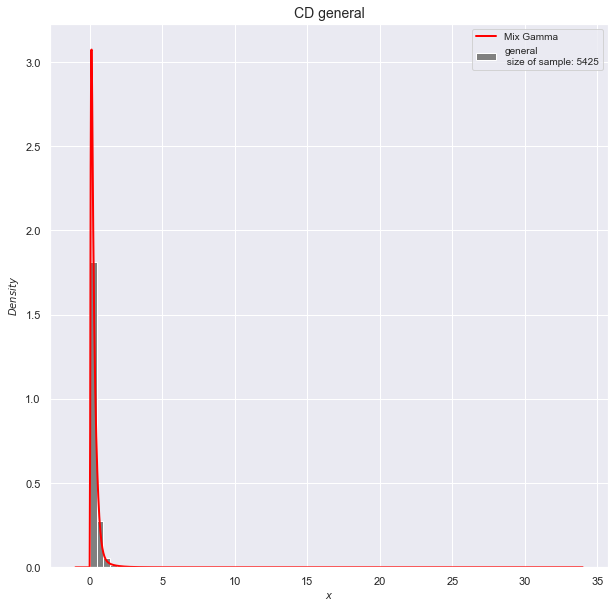

In [28]:
sh_loc_sc1, lamb1 = FormShLocScLamb('2.7589190 2.70477870 0.8766423  0.6477563', '0.1235545 0.05113621 0.6938564 25.5131861',
                                   '0.488192534 0.395711914 0.114730769 0.001364783')

x = np.linspace(-1, max(VALUES['all']),1000)



print('Веса: {0}'.format(lamb1))  
fig3 = EMGammaMixPlot_4(sh_loc_sc1, lamb1)
fig3.savefig(ELEM_NAME+'_MixGamma.png', bbox_inches='tight', pad_inches=0)